In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import statistics

df_dict = []
for tt in ['http', 'image']:
    data = json.load(open('test_{}.log'.format(tt), 'r'))
    dfs = {}
    for t in ['Cold Start', 'Warm Start', 'Swapped Start']:
        dd = {
            'test': tt,
            'mode': t
        }
        for m in ['startup', 'cleanup', 'run', 'mem_ready', 'mem_run']:
            mean = statistics.mean(data[t][m])
            stdev = statistics.stdev(data[t][m])
            dd['{}'.format(m)] = mean
            # dd['{}_stdev'.format(m)] = stdev
        df_dict.append(dd)
df = pd.DataFrame(df_dict)
df


,test,mode,startup,cleanup,run,mem_ready,mem_run
0,http,Cold Start,0.499537,0.423287,0.000004,33401241.6,33287782.4
1,http,Warm Start,0.002641,0.402374,0.000005,33329152.0,33210777.6
2,http,Swapped Start,0.110586,0.558710,0.000017,4152934.4,10127769.6
3,image,Cold Start,0.493447,0.433916,0.010733,35196518.4,35067904.0
4,image,Warm Start,0.002884,0.407915,0.016102,35139174.4,35007283.2
5,image,Swapped Start,0.118657,0.562912,0.061073,4118528.0,14910259.2


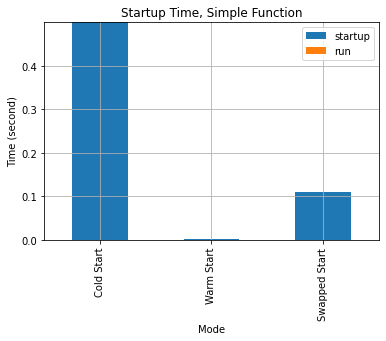

In [2]:
df_http = df[df.test == 'http']
df_http
df_http.plot.bar(x='mode', y=['startup', "run"], xlabel="Mode", ylabel="Time (second)", title="Startup Time, Simple Function", stacked=True)
plt.grid()
# fig, axes = plt.subplots(1,1, figsize=(7,5))

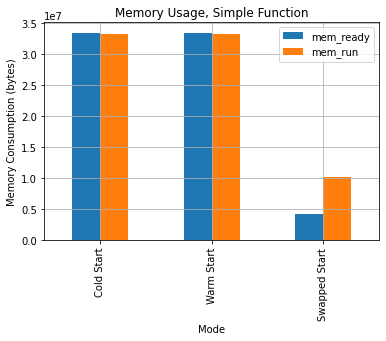

In [3]:
df_http = df[df.test == 'http']
df_http
df_http.plot.bar(x='mode', y=['mem_ready', 'mem_run'], xlabel="Mode", ylabel="Memory Consumption (bytes)", title="Memory Usage, Simple Function")
plt.grid()
# fig, axes = plt.subplots(1,1, figsize=(7,5))

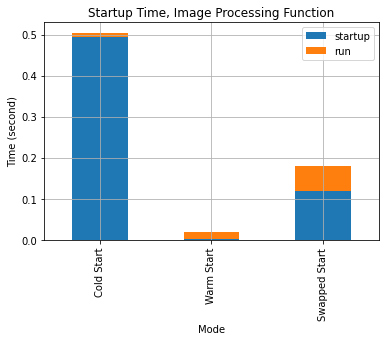

In [4]:
df_http = df[df.test == 'image']
df_http
df_http.plot.bar(x='mode', y=['startup', 'run'], xlabel="Mode", ylabel="Time (second)", title="Startup Time, Image Processing Function", stacked=True)
plt.grid()
# fig, axes = plt.subplots(1,1, figsize=(7,5))

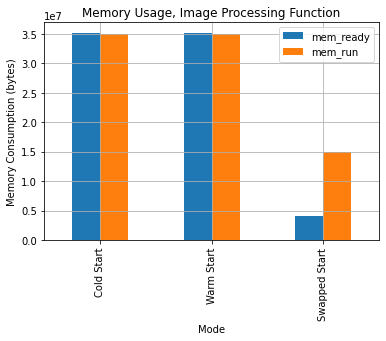

In [5]:
df_http = df[df.test == 'image']
df_http
df_http.plot.bar(x='mode', y=['mem_ready', 'mem_run'], xlabel="Mode", ylabel="Memory Consumption (bytes)", title="Memory Usage, Image Processing Function")
plt.grid()
# fig, axes = plt.subplots(1,1, figsize=(7,5))